<img src=https://i.postimg.cc/jSJzrgms/image.png, width=600>

# 🍴 성공하는 식당의 비밀: 데이터로 증명하는 고객 만족의 법칙

### 1. 배경: 직관의 한계를 넘어서는 경영
식당 운영은 흔히 '예술'이나 '감각'의 영역으로 여겨집니다. 많은 경영자가 자신의 경험이나 시장의 유행, 혹은 막연한 추측에 의존하여 매장을 운영합니다. 하지만 수많은 선택지가 존재하는 현대 외식 시장에서, 화려한 겉모습이나 운영자의 주관적인 판단만으로는 지속 가능한 성장을 담보하기 어렵습니다.

성공적인 매장 운영을 위해서는 "무엇이 고객을 다시 오게 만드는가?"라는 질문에 대한 객관적인 답이 필요합니다. 우리는 단순히 '맛있으면 성공한다'는 고정관념에서 벗어나, 실제 고객들이 남긴 평점 데이터 속에 숨겨진 진짜 가치를 발견해야 합니다.

### 2. 숫자로 읽는 고객의 진심
본 분석에서는 10,317명의 실제 고객 피드백을 바탕으로 과학적인 접근을 시도합니다. 개별 고객의 목소리를 수치화된 데이터로 변환하여 분석함으로써, 인간의 눈으로는 파악하기 힘든 거시적인 흐름과 패턴을 찾아냅니다.

**맛**(Taste), **청결**(Clean), **서비스**(Service)라는 세 가지 핵심 요소가 고객의 최종 평가에 어떤 메커니즘으로 기여하는지 살펴봄으로써, 자본과 인력이 한정된 식당이 어디에 우선순위를 두고 집중해야 하는지 명확한 가이드를 제시하고자 합니다.

### 3. 분석의 목적
1만여 건의 실제 설문 데이터를 활용하여 식당의 성과를 극대화할 수 있는 전략을 도출합니다.

* **핵심 동인 파악**: 맛, 청결, 서비스 중 실제 고객 평점을 결정짓는 가장 결정적인 요소는 무엇인가?
* **고객 페르소나별 최적화**: 성별과 연령대에 따라 고객이 중요하게 생각하는 가치의 우선순위가 어떻게 달라지는가?
* **효율적 자원 배분**: 경영 효율성을 높이기 위해 가장 먼저 개선하고 투자해야 할 '가성비 높은' 지표를 식별합니다.


1. 데이터 프레임 불러오기

본 데이터셋은 10,317명의 고객을 대상으로 조사된 식당 이용 경험 설문 결과입니다.

In [1]:
# 코드 1. 데이터 프레임 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 6 # 6행까지 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째자리까지
url1 = 'https://github.com/panda-kim/f/blob/main/survey.xlsx?raw=true'
df = pd.read_excel(url1)
df

,Gender,Age,Q1. Taest,Q2. Clean,Q3. Service
0,Male,59,4,4,4
1,Female,57,3,4,2
2,Male,45,4,3,3
...,...,...,...,...,...
10314,Male,45,4,3,4
10315,Female,59,3,3,4
10316,Male,35,4,4,2


## 1. 식당 고객 만족도 데이터 컬럼 정의

각 문항은 고객의 인구통계학적 특성과 항목별 만족도(Rating)를 담고 있습니다.

### 1.1. 인구통계학적 정보 (Demographics)
* **Gender**: 고객의 성별 (Male / Female)
* **Age**: 고객의 연령대 (예: 35, 45, 59 등)

### 1.2. 만족도 평가 지표 (Satisfaction Ratings)
모든 설문 문항은 일반적으로 1점(매우 불만족)에서 5점(매우 만족) 사이의 척도로 구성됩니다.

* **Q1. Taste (맛)**: 음식의 맛에 대한 만족도
* **Q2. Clean (청결)**: 매장 위생 및 청결 상태에 대한 만족도
* **Q3. Service (서비스)**: 직원 친절도 및 응대 매너에 대한 만족도

---

🔍 데이터 탐색 포인트 (EDA Plan)

이 데이터셋으로 다음과 같은 인사이트를 도출할 수 있습니다.

1. **상관관계 분석**: 맛(Q1), 청결(Q2), 서비스(Q3) 중 전체적인 만족도(혹은 재방문 의사)에 가장 큰 영향을 미치는 '핵심 요인'은 무엇인가?
2. **연령대별 선호도 비교**: 나이가 많을수록 맛보다 청결(Clean)을 더 중요하게 생각하는가?
3. **성별 차이 분석**: 남성과 여성 간에 서비스(Service) 만족도에 유의미한 점수 차이가 있는가?
4. **페르소나 분석**: 50대 남성 그룹이 가장 높게 평가하는 항목과 30대 여성 그룹이 가장 중요하게 생각하는 항목의 차이점 발견.

## 2. 데이터 기본 정보 확인

In [2]:
# 코드 2. info 함수로 데이터 프레임 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10317 entries, 0 to 10316
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       10317 non-null  object
 1   Age          10317 non-null  int64 
 2   Q1. Taest    10317 non-null  int64 
 3   Q2. Clean    10317 non-null  int64 
 4   Q3. Service  10317 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 403.1+ KB


결측값을 확인해야 하지만, info 함수 적용 결과 Null이 없기에 생략한다.

In [3]:
# 코드 3. df의 columns 확인하기
df.columns

Index(['Gender', 'Age', 'Q1. Taest', 'Q2. Clean', 'Q3. Service'], dtype='object')

In [4]:
# 코드 4. df의 기술 통계 확인하기
df.describe()

,Age,Q1. Taest,Q2. Clean,Q3. Service
count,10317.00,10317.00,10317.00,10317.00
mean,39.54,3.94,3.35,3.90
std,9.84,1.02,1.18,1.12
...,...,...,...,...
50%,39.00,4.00,4.00,4.00
75%,46.00,5.00,4.00,5.00
max,65.00,5.00,5.00,5.00


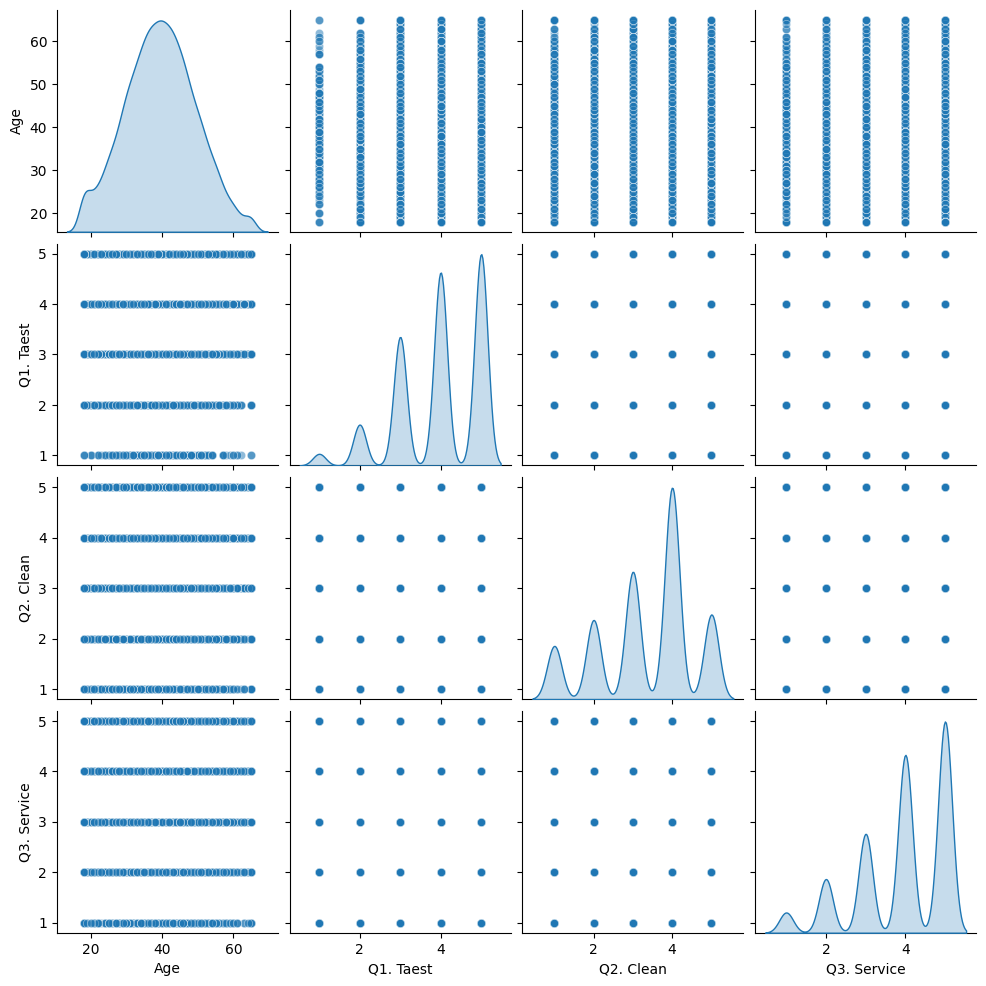

In [5]:
# 코드 5. pair plot 생성
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})

<Axes: >

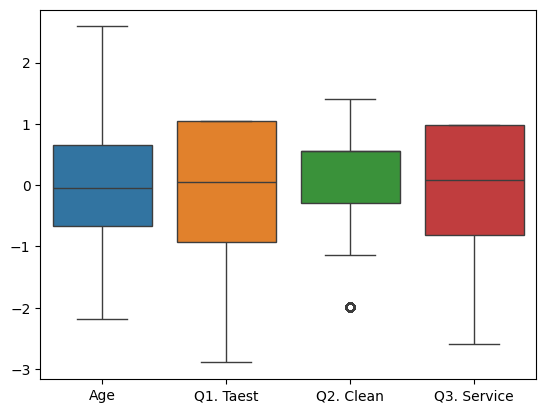

In [6]:
# 코드 6. 수치형 데이터를 표준화하여 박스 플롯 생성
# 수치형 데이터만 선택하여 표준화 (Z-score Scaling)
df_numeric = df.select_dtypes(include=['number'])
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()

# 박스 플롯 생성
sns.boxplot(data=df_scaled)

Gender
Male      6582
Female    3735
Name: count, dtype: int64


<Axes: xlabel='Gender'>

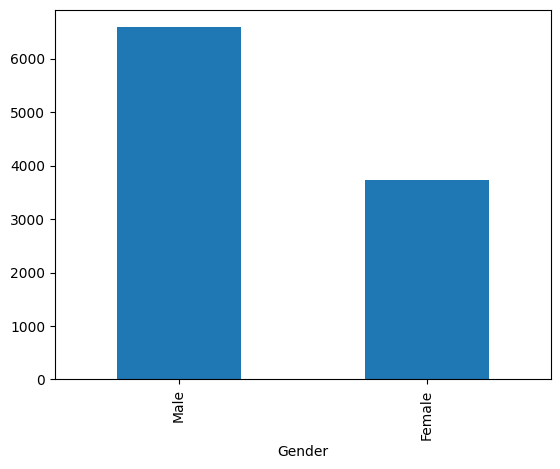

In [7]:
# 코드 7. 성별별 응답자 수를 막대그래프로 시각화
print(df['Gender'].value_counts())

df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='Count'>

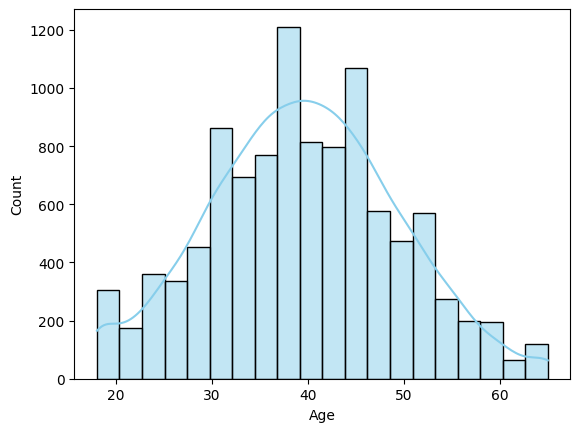

In [8]:
# 코드8. 나이 분포 히스토그램
sns.histplot(df['Age'], kde='True', bins=20, color='skyblue')

<Axes: xlabel='Age', ylabel='Density'>

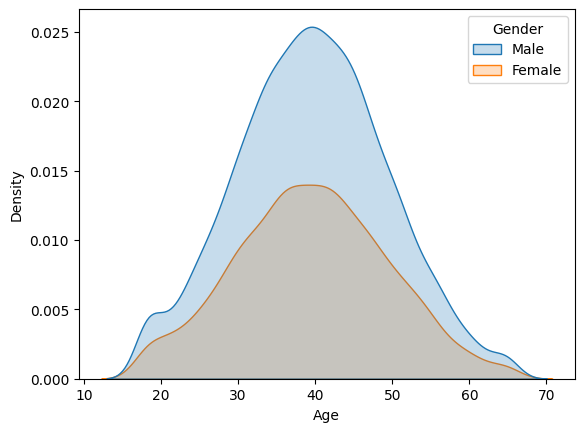

In [9]:
# 코드 9. 나이 분포 kde(성별로 나누어)
sns.kdeplot(data=df, x='Age', fill=True, hue='Gender')

## 3. 평점 결과 분석

In [10]:
# 코드 10. 전체 평점 평균
cols = df.filter(like='Q').columns
df[cols].stack().mean()
df[cols].mean().mean() # NaN이 없으므로 이 방식도 가능

np.float64(3.731446479919873)

In [11]:
# 코드 11. 남녀 평균 평점
df.groupby('Gender')[cols].mean().mean(axis=1)

,0
Gender,
Female,3.60
Male,3.81


In [12]:
# 코드 12. 전체 점수 현황
cols = df.filter(like='Q').columns
df[cols].stack().value_counts().sort_index()

,count
1,1563
2,3175
3,6447
4,10592
5,9174


<Axes: >

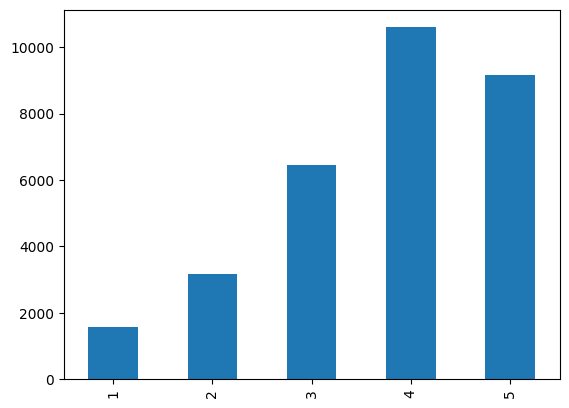

In [13]:
# 코드 13. 전체 점수 현황 시각화
df[cols].stack().value_counts().sort_index().plot(kind='bar')

In [14]:
df[cols]

,Q1. Taest,Q2. Clean,Q3. Service
0,4,4,4
1,3,4,2
2,4,3,3
...,...,...,...
10314,4,3,4
10315,3,3,4
10316,4,4,2


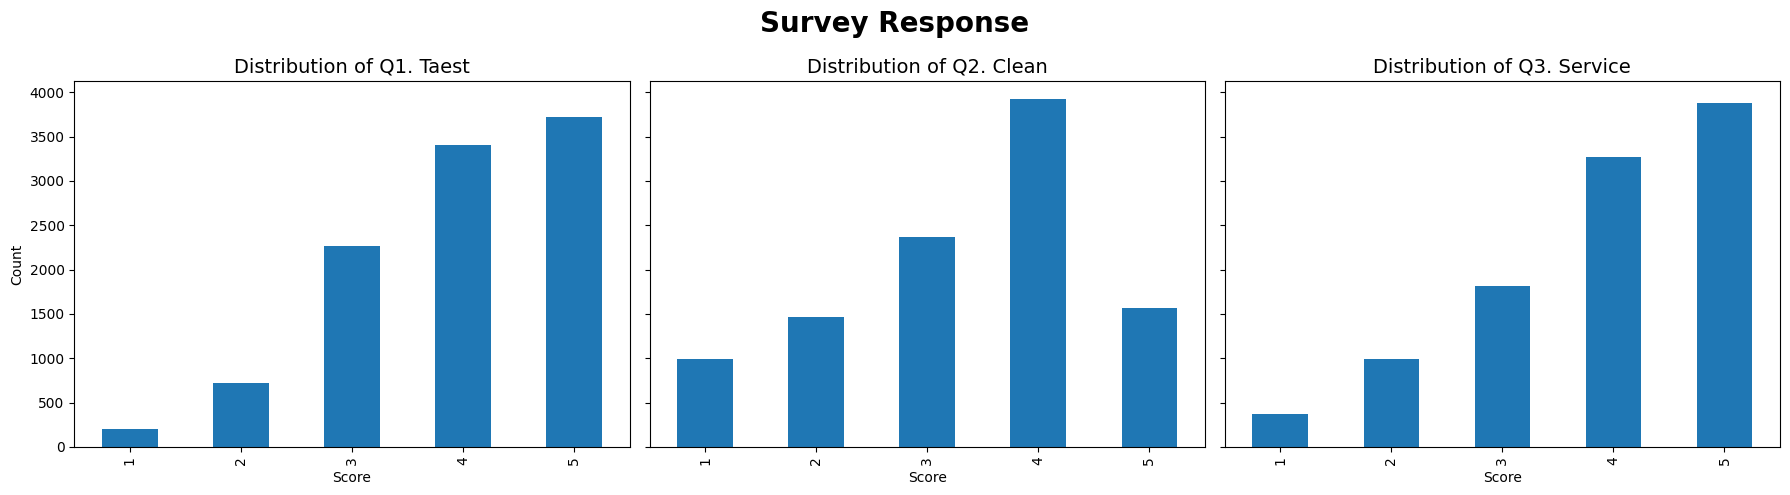

In [15]:
# 코드 14. 문항별 점수 현황 시각화
# 1. 서브플롯 생성 (1행 3열, y축 공유)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Survey Response', fontsize=20, fontweight='bold')


# 2. 반복문을 이용한 그래프 생성
cols = df.filter(like='Q').columns

for i, col in enumerate(cols):
    # 빈도 계산 및 인덱스 정렬 (1점~5점 순서대로)
    # value_counts() 결과인 Series에 대해 바로 .plot() 호출
    df[col].value_counts().sort_index().plot(
        kind='bar',
        ax=axes[i],
    )

    # 각 서브플롯의 제목 및 라벨 보정
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Count')

# 3. 레이아웃 다듬기
plt.tight_layout()
plt.show()

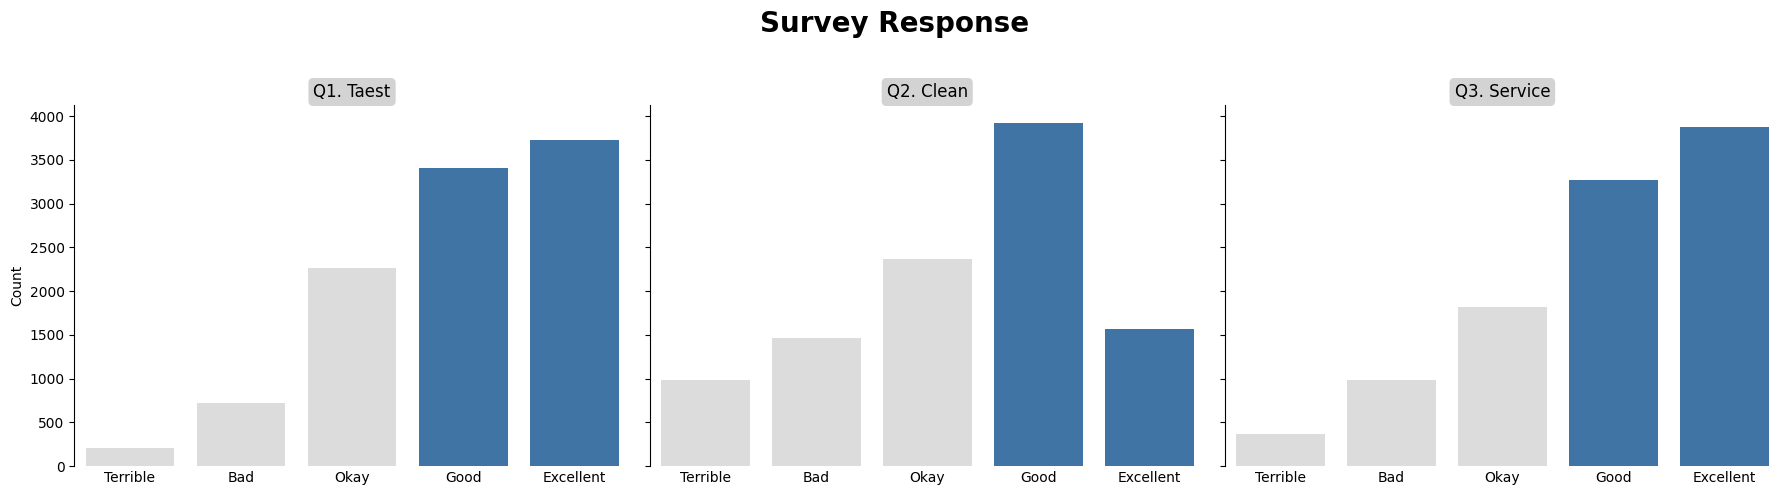

In [16]:
# 코드 15. 문항별 점수 현황 시각화
# 서브플롯 생성 (1행 3열, y축 공유)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Survey Response', fontsize=20, fontweight='bold')

# 각 문항별 막대 그래프
cols = df.filter(like='Q').columns
custom_labels = ['Terrible', 'Bad', 'Okay', 'Good', 'Excellent']
# ['#DCDCDC'] * 3 + ['#87CEFA'] + ['#2E75B6']
bar_color = ['#DCDCDC'] * 3 + ['#2E75B6'] * 2
my_pallette = dict(zip(range(1, 6), bar_color))

for i, q in enumerate(cols):
    ax = axes[i]

    # countplot 그리기 (hue 사용으로 palette 경고 제거)
    sns.countplot(data=df, x=q, palette=my_pallette, hue=q, ax=ax, legend=False)

    # responses 순서에 맞춰 눈금 위치를 고정
    ax.set_xticks(range(len(custom_labels)))
    ax.set_xticklabels(custom_labels, rotation=0)

    # 소제목 설정 + 배경 박스
    ax.set_title(
        q,
        color='black',
        bbox=dict(
            facecolor='lightgray', edgecolor='none', boxstyle='round,pad=0.3')
    )

    # x축 라벨 제거
    ax.set_xlabel('')

    # x축 눈금선 제거, 라벨은 유지
    ax.tick_params(axis='x', length=0)

    # y축 라벨은 첫 번째 subplot에만 표시
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel('')

    # 테두리 경계 제거 (상단, 우측, 하단)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [17]:
# 코드 16. 답변 중 4점 이상 비율
df[cols].stack().ge(4).mean()

np.float64(0.6386223385351039)

In [18]:
# 코드 17. 항목별 4점 이상 비율
df[cols].ge(4).mean()

,0
Q1. Taest,0.69
Q2. Clean,0.53
Q3. Service,0.69


In [19]:
# 코드 18. pain point 찾기
df[cols].mean()

,0
Q1. Taest,3.94
Q2. Clean,3.35
Q3. Service,3.90


Text(0.5, 0, 'score')

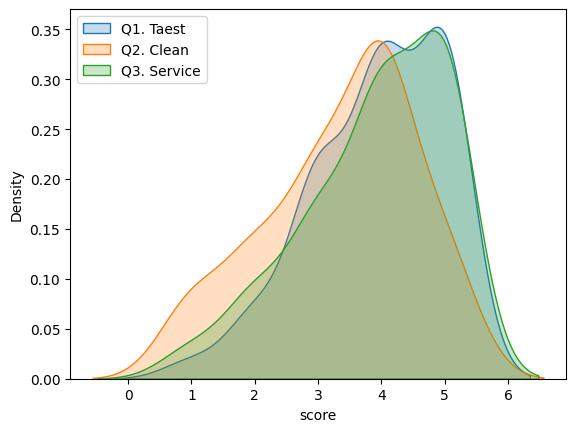

In [20]:
# 코드 19. kde 그래프로 pain point 찾기
for col in cols:
    sns.kdeplot(data=df[col], fill=True, bw_adjust=2.8, label=col)

plt.legend()
plt.xlabel('score')

In [21]:
# 코드 20. 성별로 나누어 pain point 찾기
df.groupby('Gender')[cols].mean()

,Q1. Taest,Q2. Clean,Q3. Service
Gender,,,
Female,4.13,2.84,3.81
Male,3.83,3.64,3.95


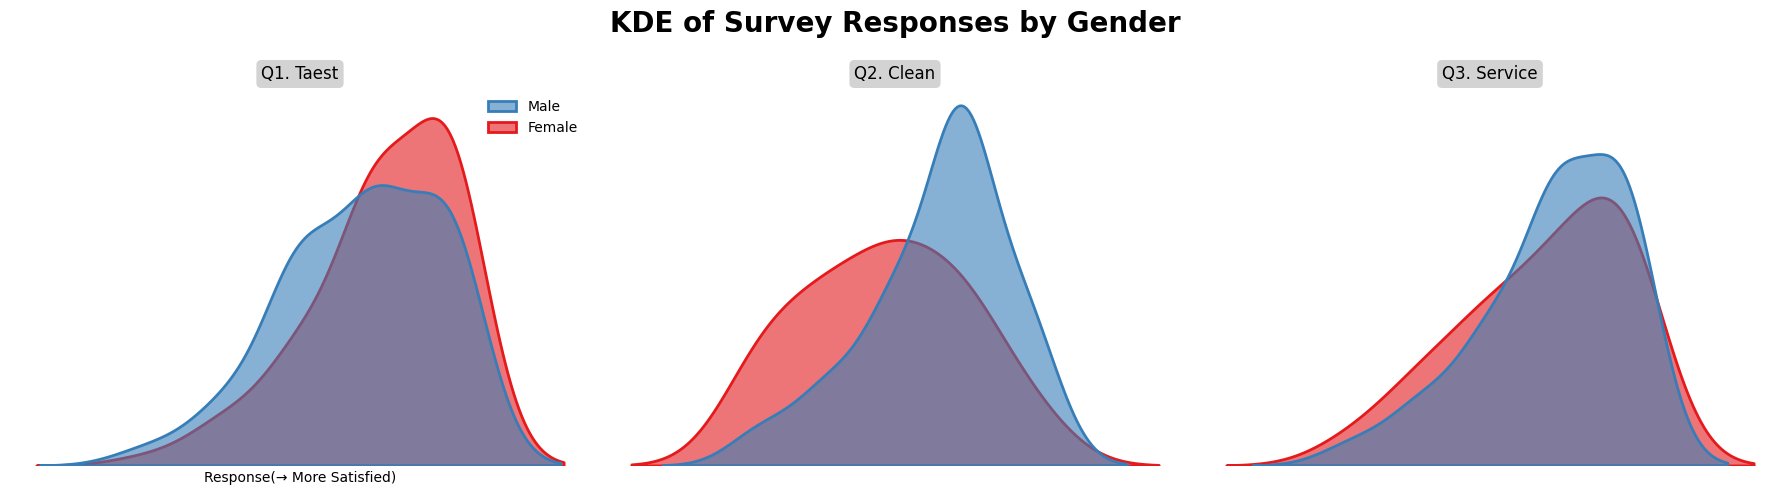

In [22]:
# 코드 21. 성별로 나누어 KDE 그래프로 pain point 찾기

# 서브플롯 생성


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
cols = df.filter(like='Q').columns
colors = {'Female': '#e41a1c', 'Male': '#377eb8'}
for i, q in enumerate(cols):
    ax = axes[i]
    sns.kdeplot(
        data=df,
        x=q,
        hue='Gender',
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=2,
        palette=colors,
        ax=ax,
        bw_adjust=2.8,
        legend=(i == 0)  # 왼쪽만 legend 표시
    )

    # 소제목 설정 + 배경 박스
    ax.set_title(
        q,
        color='black',
        bbox=dict(
            facecolor='lightgray',
            edgecolor='none',
            boxstyle='round,pad=0.3'
            )
        )

    # x, y축 라벨: 왼쪽만 표시
    if i == 0:
        ax.set_xlabel('Response(→ More Satisfied)')
        # legend의 제목 제거 및 배경 박스 제거
        ax.legend_.set_title('')  # legend의 제목 제거
        ax.legend_.get_frame().set_visible(False)  # 배경 박스 제거

    else:
        ax.set_xlabel('')

    ax.set_ylabel('')


    # x, y축 눈금과 눈금 라벨 제거
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # grid 제거
    ax.grid(False)

    # 테두리 제거: 위, 오른쪽, 아래
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# 그래프 요소들이 겹치지 않도록 여백 자동 조정
plt.tight_layout(rect=[0, 0, 1, 0.90])

# 전체 제목
title = 'KDE of Survey Responses by Gender'
plt.suptitle(title, fontsize=20, fontweight='bold')

# 그래프 출력
plt.show()

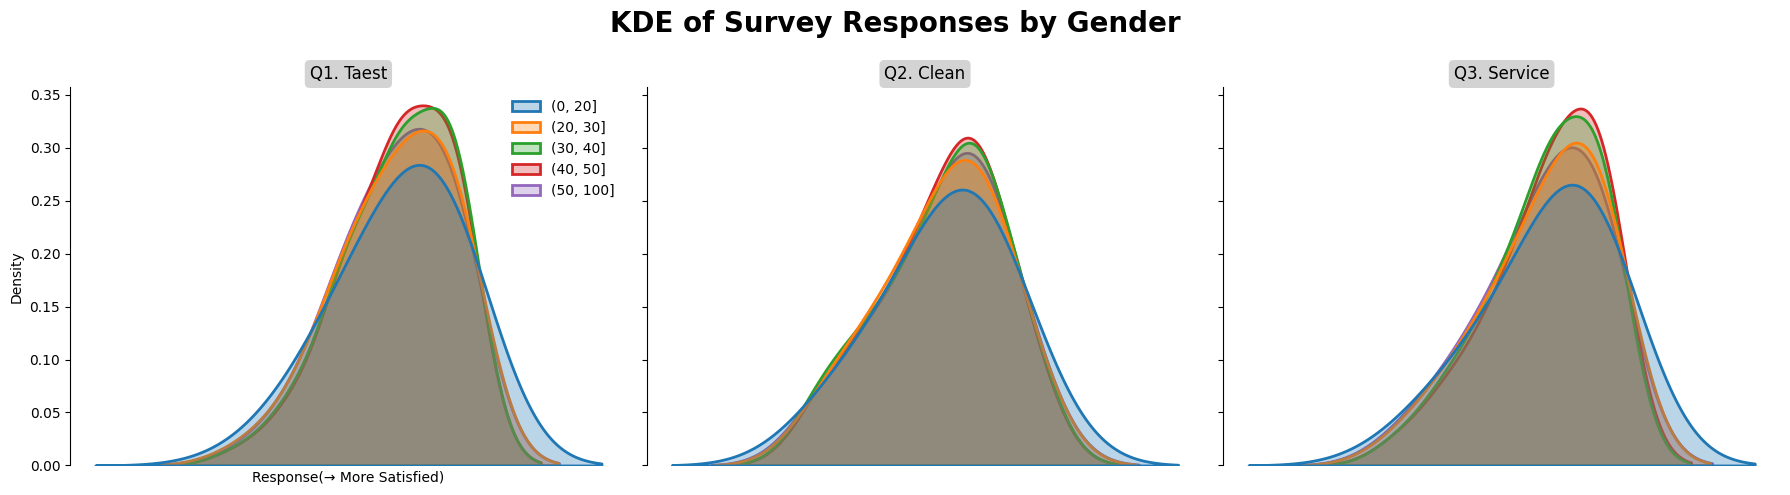

In [23]:
# 코드 22. 나이로 KDE 그래프로 pain point 찾기
# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
cols = df.filter(like='Q').columns
for i, q in enumerate(cols):
    ax = axes[i]
    sns.kdeplot(
        data=df,
        x=q,
        hue=pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100]),
        fill=True,
        common_norm=False,
        alpha=0.3,
        linewidth=2,
        ax=ax,
        bw_adjust=2.8,
        legend=(i == 0)  # 왼쪽만 legend 표시
    )

    # 소제목 설정 + 배경 박스
    ax.set_title(
        q,
        color='black',
        bbox=dict(
            facecolor='lightgray',
            edgecolor='none',
            boxstyle='round,pad=0.3'
            )
        )

    # x, y축 라벨: 왼쪽만 표시
    if i == 0:
        ax.set_xlabel('Response(→ More Satisfied)')
        ax.set_ylabel('Density')
        # legend의 제목 제거 및 배경 박스 제거
        ax.legend_.set_title('')  # 제목 제거
        ax.legend_.get_frame().set_visible(False)  # 배경 박스 제거

    else:
        ax.set_xlabel('')
        ax.set_ylabel('')


    # x축 눈금과 라벨 제거
    ax.set_xticks([])
    ax.set_xticklabels([])

    # grid 제거
    ax.grid(False)

    # 테두리 제거: 위, 오른쪽, 아래
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# 그래프 요소들이 겹치지 않도록 여백 자동 조정
plt.tight_layout(rect=[0, 0, 1, 0.90])

# 전체 제목
title = 'KDE of Survey Responses by Gender'
plt.suptitle(title, fontsize=20, fontweight='bold')

# 그래프 출력
plt.show()

이 그래프는 **남성(파랑), 여성(빨강)의 설문 응답 분포(KDE)**를 보여주고 있으며, 각 항목은 Q1. Taste, Q2. Clean, Q3. Service로 나뉘어 있습니다.

1️⃣ Q1. Taste (맛)

여성의 분포가 남성보다 오른쪽(더 높은 만족도) 쪽에 치우쳐 있음.

즉, 여성 고객은 맛에 대해 전반적으로 더 만족하는 편.

반대로 남성 고객은 상대적으로 맛 만족도가 낮은 경우가 더 많음.

👉 보완 포인트: 남성 고객층이 좋아할 수 있는 메뉴 개발(양, 간, 풍미 강화) 필요.

2️⃣ Q2. Clean (청결)

남성은 청결 만족도가 전반적으로 높게 분포.

여성은 남성보다 전반적으로 낮은 점수 분포를 보임.

특히 여성 응답에서는 불만족 쪽 꼬리가 두드러짐.

👉 보완 포인트: 여성 고객이 민감하게 느낄 수 있는 위생·청결 부분(화장실, 테이블 위 상태, 냄새, 주방 오픈 여부 등) 개선 필요.

3️⃣ Q3. Service (서비스)

남성은 서비스 만족도가 상대적으로 높음.

여성은 서비스에 대한 만족도가 상대적으로 낮게 분포.

여성의 분포가 왼쪽으로 치우쳐 있어, 불친절·응대 속도·세심함 부족을 느낄 가능성이 있음.

👉 보완 포인트: 서비스 교육 강화, 특히 섬세한 응대와 배려 있는 커뮤니케이션 필요.

📌 종합 분석

맛: 남성 고객 만족도를 끌어올려야 함. → 메뉴 다양화, 간 맞춤, 고기·양 많은 메뉴 강화.

청결: 여성 고객 위주로 청결에 불만족이 큼. → 화장실·주방 청결, 위생 체크 강화.

서비스: 여성 고객 서비스 만족도가 낮음. → 직원 친절 교육, 세심한 응대 강화 필요.

💡 전략 제안:

"맛은 남성 고객 강화, 청결·서비스는 여성 고객 강화"라는 투트랙 접근이 효과적.

여성 고객의 만족도가 올라가면 재방문율과 추천율에 큰 영향을 줄 가능성이 높음.

원하시면 제가 이 데이터를 바탕으로 **실행 우선순위 (예: 맛 vs 청결 vs 서비스)**를 정리해 드릴까요?

✅ 개선 우선순위
1순위: 청결 (Clean)

여성 고객(약 40%)의 청결 불만족이 뚜렷함.

위생 문제는 고객이 단번에 재방문을 포기하는 핵심 요인.

특히 여성 고객은 지인 추천에 영향력이 크므로, 위생 개선이 곧 브랜드 평판으로 직결됨.

👉 실행 과제:

화장실/테이블 위 청소 주기 강화

냄새 관리, 위생 점검 시스템 도입

청결 인증(예: "매일 위생 점검 완료" 안내)으로 신뢰 확보

2순위: 서비스 (Service)

남성은 만족도가 높지만, 여성은 서비스 만족도가 낮음.

친절/세심함 부족으로 여성 고객의 경험이 나빠질 수 있음.

서비스는 입소문·리뷰와 직결되므로 매출에도 장기적 영향이 큼.

👉 실행 과제:

직원 친절 교육, 응대 매뉴얼 정비

고객 요청 대응 속도 개선

“작은 배려” 강화 (예: 물 먼저 제공, 고객 눈 마주치며 인사)

3순위: 맛 (Taste)

여성은 이미 높은 만족도를 보임.

남성 고객이 상대적으로 낮은 점수를 주고 있어 부분 개선 여지 존재.

다만 청결·서비스에 비해 재방문 결정의 긴급성은 낮음.

👉 실행 과제:

남성 고객 선호 반영: 양 많고 진한 맛 메뉴 강화

계절별/한정판 메뉴로 흥미 유발

기존 인기 메뉴는 유지하면서 세부 보완

📌 최종 정리

1️⃣ 청결 → 최우선 개선 (여성 고객 불만 해소 = 브랜드 신뢰 회복)
2️⃣ 서비스 → 친절/배려 강화 (특히 여성 고객 만족도 제고)
3️⃣ 맛 → 남성 고객 취향 반영해 보완
